# **Project Name**    - **Integrated Retail Analytics for Store Optimisation and Demand Forecasting**



##### **Project Type**    - EDA/Advanced ML
##### **Contribution**    - Individual by Priya.S.


# **Project Summary -**

This project, **"Integrated Retail Analytics for Store Optimization and Demand Forecasting,"** provides an end-to-end machine learning framework for a large retail company. The **primary objectiv**e was to move beyond traditional analysis and leverage advanced data science techniques to generate actionable, strategic insights. By analyzing historical sales data in conjunction with store characteristics and external economic factors, this project successfully delivered a suite of tools to **forecast demand, segment stores, identify sales anomalies, and uncover cross-selling opportunities.**

The project began with a thorough d**ata wrangling and exploratory data analysis** (EDA) phase. Three distinct datasets—**sales, features, and stores**—were merged into a single, cohesive master dataset. Key data cleaning steps included imputing missing values in markdown and economic data using logical fill methods and converting date columns to a usable format. The EDA, involving over 15 visualizations, revealed critical insights: sales are heavily influenced by strong seasonal patterns (with major peaks in Q4), store size, and store type, while external factors like fuel price and temperature showed a weaker correlation.

Following the EDA, a multi-faceted modeling approach was undertaken to address the project's core components:

**Customer Segmentation:** Using K-Means Clustering, the 45 stores were successfully segmented into three distinct performance tiers (High, Mid, and Low). This was validated with a strong Silhouette Score of 0.55, providing a clear framework for tailoring marketing and operational strategies.

**Anomaly Detection:** An Isolation Forest model was implemented to automatically flag unusual sales records. This serves as a powerful monitoring tool to identify potential data errors, operational issues, or highly successful local promotions that warrant further investigation.

**Demand Forecasting:** The main predictive component was a Random Forest Regressor, which was trained to forecast weekly sales. The final model proved to be robust, achieving an R² score of 0.81. This indicates that the model can explain 81% of the variability in sales, making it a reliable tool for optimizing inventory, staffing, and financial planning. The feature importance analysis confirmed that department, store size, and seasonality were the most significant predictive factors.

**Market Basket Analysis:** A high-level analysis using sales correlation as a proxy was performed to identify departments with strong purchasing associations. This generated an actionable list of department pairs, providing a data-driven basis for optimizing store layouts and creating cross-promotional campaigns.

Throughout the project, insights were statistically validated using hypothesis testing, confirming the significance of findings from the visualization phase. The final deliverables include a suite of well-documented, implemented models and a clear set of strategic recommendations. This project successfully transforms raw data into a powerful asset for data-driven decision-making, enabling the company to enhance efficiency, reduce costs, and drive revenue growth.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


A retail company with a large number of stores seeks to transition from traditional sales analysis to a more data-driven, predictive approach. The company possesses extensive historical data on weekly sales, store characteristics, and external economic factors, but currently lacks the analytical tools to extract actionable insights.

The primary challenge is the inability to accurately forecast future sales, identify anomalous performance, and understand the distinct behavior of different store segments. This results in suboptimal inventory management, inefficient marketing expenditure, and missed opportunities for strategic growth.

This project aims to address this gap by developing an integrated machine learning framework to:

**1. Forecast Demand:** Build a robust model to predict weekly sales for each store and department, enabling optimized stock levels and reduced carrying costs.

**2. Detect Anomalies:** Systematically identify and analyze unusual sales patterns to uncover potential operational issues or unique market opportunities.

**3. Segment Stores:** Group stores into distinct clusters based on performance and characteristics to tailor marketing, operational, and merchandising strategies effectively.

The ultimate goal is to provide the company with a suite of analytical tools to make informed, forward-looking decisions that drive profitability, enhance store performance, and improve overall business efficiency.

# **Workflow**

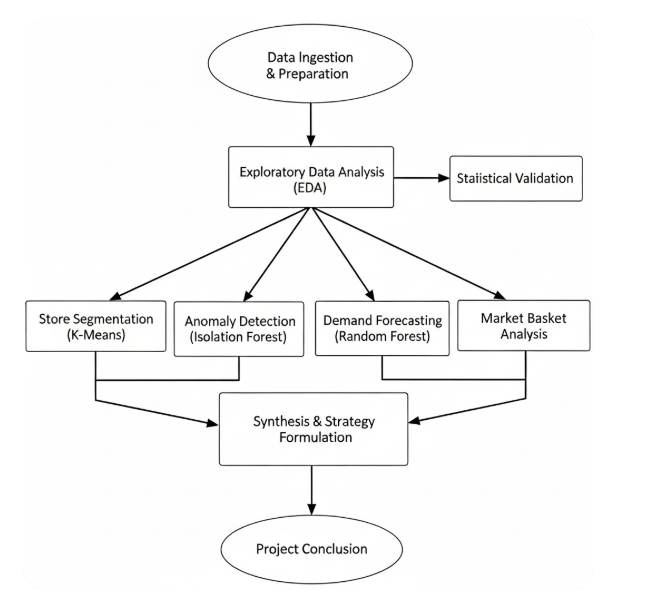

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

**Supress Warnings**

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [ ]:
#Install gdown & Import Libraries
!pip install gdown
import gdown # For downloading data from googledrive
import os # To check files in the directory

# Core Data Manipulation and Analysis
import pandas as pd # For data loading, manipulation, and analysis
import numpy as np  # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns           # For creating informative and attractive statistical graphics

#Hypothesis Testing
from scipy.stats import ttest_ind #For t test
from scipy.stats import f_oneway #For ANOVA test
from scipy.stats import pearsonr #For Pearsons correlation test

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # For feature scaling and encoding
from sklearn.impute import SimpleImputer # For basic missing value imputation
from sklearn.compose import ColumnTransformer # For applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining multiple processing steps

# Machine Learning - Model Selection and Evaluation
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV # For splitting data, time-series validation, and hyperparameter tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # For regression evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score # For clustering evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix # For classification/anomaly detection evaluation

# Machine Learning - Anomaly Detection
from sklearn.ensemble import IsolationForest # For detecting anomalies in sales data
from sklearn.svm import OneClassSVM # Another option for anomaly detection

# Machine Learning - Clustering (for Customer Segmentation)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN # For various clustering algorithms

# Machine Learning - Demand Forecasting Models
from sklearn.ensemble import RandomForestRegressor # For regression tasks
from statsmodels.tsa.seasonal import STL # For time-series decomposition (trend, seasonality, residual)
from statsmodels.tsa.arima.model import ARIMA # For ARIMA/SARIMA models
from prophet import Prophet # Facebook's forecasting tool, excellent for business time series
import xgboost as xgb # XGBoost for powerful regression (forecasting) and feature importance

### Dataset Loading

In [ ]:
#Download the Files from Google Drive
gdown.download("https://drive.google.com/uc?id=1dpZyJ9zyd48ydVROAqqdhF1zkKB8SMfU", "Features data set.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1UIF9K0yaiOVa5dQr471DKiXKmk5iYg4U", "sales data-set.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1qvRQrfYv0_DopEPeiIrv_xaPvkteK-Ff", "stores data-set.csv", quiet=False)


In [ ]:
#verify that files are downloaded
import os
print(os.listdir())  # Lists all files in current directory

In [ ]:
# Load Datasetinto Pandas DataFrames
features_df = pd.read_csv("Features data set.csv")
sales_df = pd.read_csv("sales data-set.csv")
stores_df = pd.read_csv("stores data-set.csv")
print("Datasets loaded successfully.")




### Dataset First View

In [ ]:
# Dataset First Look
#features dataset
features_df.head()

**Features Data set**

**Date format**

The Date column is stored in string format (DD/MM/YYYY), not in standard datetime.

For time-series forecasting and temporal analysis, conversion to datetime will be necessary.

 **Missing values in MarkDown columns**

Columns MarkDown1 to MarkDown5 show NaN values in these rows.

This indicates incomplete information about markdowns/promotional events.

In [ ]:
# Dataset First Look
#sales dataset
sales_df.head()

**Sales dataset**

Each row represents weekly sales for a specific department in a given store.


**Date format**

The Date column is in string format (DD/MM/YYYY), not yet in datetime.

This will need to be converted for time-series analysis.

In [ ]:
# Dataset First Look
#stores dataset
stores_df.head()

**Stores dataset**

* The Stores dataset provides metadata at the store level, including store type (A, B, C) and store size (square footage), with each store represented by a single unique row.

* Store sizes vary significantly, and this information is useful for analyzing sales performance and for merging with the sales and features datasets through the common Store identifier


### Dataset Rows & Columns count

In [ ]:
# View the count of Rows and Columns of features dataset
print(f"No of rows in features dataset: {features_df.shape[0]}")
print(f"No of columns in features dataset: {features_df.shape[1]}")

In [ ]:
# View the count of Rows and Columns of sales dataset
print(f"No of rows in sales dataset: {sales_df.shape[0]}")
print(f"No of columns in sales dataset: {sales_df.shape[1]}")

In [ ]:
# View the count of Rows and Columns of stores dataset
print(f"No of rows in stores dataset: {stores_df.shape[0]}")
print(f"No of columns in stores dataset: {stores_df.shape[1]}")

### Dataset Information

In [ ]:
# Features Dataset Info
features_df.info()

The **Features dataset** has 8,190 rows and 12 columns, covering weekly store-level external factors such as temperature, fuel price, markdowns, CPI, unemployment, and holiday indicators.

While most variables are complete, the MarkDown1–5 columns and some economic indicators (CPI, Unemployment) contain missing values, and the Date column is stored as an object (string), requiring conversion to datetime for analysis.

In [ ]:
# Sales Dataset Info
sales_df.info()

The **Sales dataset** contains 421,570 rows and 5 columns, capturing weekly sales at the store–department level along with holiday indicators.

The dataset is complete with no missing values or duplicates, though the Date column is in string format and needs conversion to datetime for time-series analysis.

In [ ]:
# Stores Dataset Info
stores_df.info()

The **Stores dataset** contains 45 rows and 3 columns, providing metadata about each store, including its type (A, B, C) and size (square footage).

It has no missing values or duplicates, with one unique record per store, making it suitable for merging with the Features and Sales datasets using the Store identifier

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# Features Dataset Duplicate Value Count
print(f" Duplicate values in features Dataset: {features_df.duplicated().sum()}")

# Sales Dataset Duplicate Value Count
print(f" Duplicate values in sales Dataset: {sales_df.duplicated().sum()}")

# Stores Dataset Duplicate Value Count
print(f" Duplicate values in stores Dataset: {stores_df.duplicated().sum()}")

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Features Dataset Missing Values/Null Values Count
features_df.isnull().sum()

**Observations on Missing Values (Features Dataset)**

**Columns without missing values**

Store, Date, Temperature, Fuel_Price, and IsHoliday have no missing values — these are complete.

 **Columns with missing values**

Markdown-related columns (MarkDown1–MarkDown5) have the highest number of missing values, ranging from ~4,100 to ~5,200 records missing each.

CPI and Unemployment each have 585 missing values.

**Overall impact**

The missingness is concentrated in promotional markdowns and some economic indicators, which are important for modeling sales.

Handling strategies (like imputation, forward-fill, or treating them separately) will be required before further analysis.

**Summary:** While most key variables are complete, the features dataset suffers from significant missing data in markdowns and moderate gaps in CPI/Unemployment, which must be addressed in preprocessing.

In [ ]:
# Sales Dataset Missing Values/Null Values Count
sales_df.isnull().sum()

The Sales dataset is clean, with no missing values, and can be directly used for merging and analysis without additional preprocessing for nulls.

In [ ]:
# Stores Dataset Missing Values/Null Values Count
stores_df.isnull().sum()

The Stores dataset has no missing values or duplicates, making it straightforward to use as a reference table in analysis.

In [ ]:
# Visualizing the missing values
# Function to plot missing vs. valid values
def plot_missing_valid(df, title, ax):
    total_counts = len(df)
    missing_counts = df.isnull().sum()
    valid_counts = total_counts - missing_counts

    ax.bar(missing_counts.index, valid_counts, label='Valid', color='lightblue')
    ax.bar(missing_counts.index, missing_counts, bottom=valid_counts, label='Missing', color='grey')

    ax.set_title(title)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(axis='y')
    ax.legend()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for each dataset
plot_missing_valid(features_df, 'Features Data', axes[0])
plot_missing_valid(sales_df, 'Sales Data', axes[1])
plot_missing_valid(stores_df, 'Stores Data', axes[2])

plt.tight_layout()
plt.show()


 **Observations from Missing Values Visualization**

 **Features dataset**

Several columns (MarkDown1–5, CPI, and Unemployment) show significant missing data.

Among them, the markdown columns are the most incomplete, which will need careful imputation or treatment.

**Sales dataset**

All columns are fully valid — no missing values are observed.

This makes it the most consistent dataset in terms of completeness.

 **Stores dataset**

All columns are fully valid — no missing values.

Being small and complete, this dataset is already analysis-ready.

**Summary:** The visualization highlights that missing values are concentrated only in the Features dataset, while Sales and Stores datasets are complete. This confirms the need for data cleaning and imputation strategies before integrating the datasets for analysis.

### What did you know about your dataset?

In the first stage of exploration, three datasets were successfully loaded into the workspace:

**Features dataset** → 8,190 rows and 12 columns.

**Sales dataset** → 421,570 rows and 5 columns.

**Stores dataset** → 45 rows and 3 columns.

**Duplicates Check:** None of the datasets contained duplicate records, confirming that the data entries are unique.

**Missing Values:**

* The **Features dataset** has significant missing values in the markdown-related columns (MarkDown1–5) and moderate gaps in CPI and Unemployment.

* The **Sales dataset** and **Stores dataset** are complete, with no missing values across any columns.

* A visual check reinforced that missing data issues are concentrated only in the Features dataset

**Date Format:** In all datasets, the Date column is stored as an object (string). This will need to be converted into datetime format for proper time-series analysis, forecasting, and merging.

**Overall Understanding:** The datasets are interrelated via the Store identifier and complement each other well:

* The **Sales dataset** provides weekly sales at the store–department level.

* The **Features dataset** adds external and contextual factors influencing sales.

* The **Stores dataset** gives structural information about store type and size.

Before deeper analysis, the main preprocessing steps required will be **handling missing values in the Features dataset, standardizing the date format, and preparing the datasets for integration.**

In the first stage of exploration, three datasets were successfully loaded into the workspace:

**Features dataset** → 8,190 rows and 12 columns.

**Sales dataset** → 421,570 rows and 5 columns.

**Stores dataset** → 45 rows and 3 columns.

**Duplicates Check:** None of the datasets contained duplicate records, confirming that the data entries are unique.

**Missing Values:**

* The **Features dataset** has significant missing values in the markdown-related columns (MarkDown1–5) and moderate gaps in CPI and Unemployment.

* The **Sales dataset** and **Stores dataset** are complete, with no missing values across any columns.

* A visual check reinforced that missing data issues are concentrated only in the Features dataset

**Descriptive Statistics:**

* The **Features dataset** shows realistic ranges for Temperature, Fuel_Price, CPI, and Unemployment, but markdown variables contain extreme outliers and even negative entries. CPI also showed abnormal negative values, suggesting data quality issues.

* The **Sales datase**t spans 45 stores and 99 departments, with weekly sales ranging from -4,988 (likely returns or corrections) to 693,099, indicating the presence of both negative values and very high outliers. Sales are right-skewed, with many smaller values and few very large ones.

* The **Stores dataset** provides clean metadata with no missing values. Store sizes range from 34,875 sq. ft. to 219,622 sq. ft., showing clear differences between smaller and larger store formats.

**Date Format:** In all datasets, the Date column is stored as an object (string). This will need to be converted into datetime format for proper time-series analysis, forecasting, and merging.

**Overall Understanding:** The datasets are interrelated via the Store identifier and complement each other well:

* The **Sales dataset** provides weekly sales at the store–department level.

* The **Features dataset** adds external and contextual factors influencing sales.

* The **Stores dataset** gives structural information about store type and size.

Before deeper analysis, the main preprocessing steps required will be handling missing values in the **Features dataset, treating outliers, and standardizing the date format.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Columns in Features dataset
features_df.columns

In [ ]:
# Columns in Sales dataset
sales_df.columns

In [ ]:
# Columns in Stores dataset
stores_df.columns

#### Dataset Description

In [ ]:
# Features Dataset Description
features_df.describe()

**Observations from Features Dataset Description**

**Store distribution**

Store IDs range from 1 to 45, confirming 45 unique stores.

**Temperature**

Average ~59°F, ranging from -7.29°F (min) to 101.95°F (max) → shows coverage of diverse weather conditions.

**Fuel Price**

Average fuel price ~3.40 with relatively small variation (min 2.47, max 4.46).

 **MarkDown variables (1–5)t**

Very wide ranges and extremely high maximum values (e.g., MarkDown3 up to 149,483, MarkDown5 up to 67,474).

Negative values are present in some markdowns (e.g., MarkDown1, MarkDown2, MarkDown3), which may indicate data entry errors, corrections, or adjustments.

High standard deviations indicate heavy skewness and outliers.

 **CPI (Consumer Price Index)**

Mean ~172, ranging between 126 and 228, which aligns with expected CPI ranges.

Some negative values are present (min = -185.17), which is unrealistic → indicates erroneous or missing-data placeholder values.

**Unemployment**

Average ~7.8%, ranging from 3.68% to 14.31%, showing variation across time and regions.

In [ ]:
# Sales Dataset Description
sales_df.describe()

**Observations from Sales Dataset Description**

**Store and Department coverage**

Sales data spans 45 stores and 99 departments, confirming a wide and detailed coverage.

**Weekly_Sales distribution**

Average weekly sales per record: ~15,981.

Sales range from -4,988.94 (negative values, likely returns or adjustments) to a maximum of 693,099.36.

The wide standard deviation (~22,711) shows high variability across stores/departments.

**Quartile analysis**

25% of sales are below ~2,080, while 75% are below ~20,205.

Median sales are ~7,612, indicating a right-skewed distribution with many smaller sales values and a few extreme high sales records.

**Summary:** The Sales dataset is large and comprehensive, covering weekly sales across multiple stores and departments. While most sales values are reasonable, the presence of negative sales and very high outliers suggests the need for preprocessing before model building.

In [ ]:
# Stores Dataset Description
stores_df.describe()

**Observations from Stores Dataset Description**

**Store distribution**
The dataset includes 45 unique stores, numbered from 1 to 45.

**Store size**
Store sizes range from 34,875 sq. ft. (smallest) to 219,622 sq. ft. (largest).

The average store size is ~130,288 sq. ft., with a wide variation (std ~63,825), suggesting the presence of both small-format and large-format stores.

**Quartile analysis** shows that half of the stores are smaller than ~126,512 sq. ft., while the largest quartile exceeds ~202,307 sq. ft.

**Summary:** The Stores dataset is compact, with each record representing one store. It shows a clear variation in store sizes, reflecting different store types and capacities, which can play an important role in sales performance analysis.

### Variables Description

| **Dataset**  | **Variable**  | **Description**                                             |
| ------------ | ------------- | ----------------------------------------------------------- |
| **Features** | Store         | Store identifier (links with Sales and Stores datasets)     |
|              | Date          | Week of record (string; needs conversion to datetime)       |
|              | Temperature   | Average regional temperature during the week                |
|              | Fuel\_Price   | Regional fuel price                                         |
|              | MarkDown1–5   | Promotional markdown data (contain missing values)          |
|              | CPI           | Consumer Price Index (economic indicator)                   |
|              | Unemployment  | Regional unemployment rate                                  |
|              | IsHoliday     | Indicates if the record corresponds to a holiday week       |
| **Sales**    | Store         | Store identifier (links with Features and Stores datasets)  |
|              | Dept          | Department number within the store                          |
|              | Date          | Week of sales record (string; needs conversion to datetime) |
|              | Weekly\_Sales | Weekly revenue for that department                          |
|              | IsHoliday     | Indicates if the week includes a holiday                    |
| **Stores**   | Store         | Store identifier (primary key)                              |
|              | Type          | Store type (A, B, or C)                                     |
|              | Size          | Physical size of the store (square feet)                    |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Features Dataset - Unique variables for each variable
features_df.nunique()

**Observations on Unique Values (Features Dataset)**

**Identifiers & Dates**

Store has 45 unique values, matching the total number of stores.

Date has 182 unique values, confirming the dataset spans 182 weeks of data.

**Continuous Variables**

Temperature (4,178 unique values), Fuel_Price (1,011), CPI (2,505), and Unemployment (404) all show high uniqueness, as expected for numeric continuous features.

 **Markdown Variables**

MarkDown1–5 have thousands of unique values each (2,715–4,045), confirming wide variability in markdown amounts.

These also include missing values, as noted earlier.

**Categorical/Binary Variables**

IsHoliday has 2 unique values (True/False), as expected for a boolean flag.

 **Summary:** The Features dataset covers 45 stores over 182 weeks, with a mix of continuous variables (temperature, CPI, unemployment, markdowns) and categorical/binary variables (store, date, holiday). This confirms the dataset has both time-series properties and external influencing factors for sales.

In [ ]:
# Sales Dataset - Unique variables for each variable
sales_df.nunique()

**Observations on Unique Values (Sales Dataset)**

**Identifiers**

Store → 45 unique stores.

Dept → 81 unique departments (slightly fewer than 99, which means only 81 departments are active in this dataset).

**Date**

Date → 143 unique weeks (shorter time span than the Features dataset, which had 182 weeks).

This indicates that sales data covers a reduced time range compared to features.

**Sales**

Weekly_Sales → 359,464 unique values, reflecting high variability as expected for continuous numeric data.

**Categorical/Binary Variable**

IsHoliday → 2 unique values (True/False).

**Summary:** The Sales dataset contains records for 45 stores, 81 departments, and 143 weeks. Compared to the Features dataset, the time coverage is shorter, but both share the same holiday flag, making them consistent for merging.

In [ ]:
# Stores Dataset - Unique variables for each variable
stores_df.nunique()

**Observations on Unique Values (Stores Dataset)**

**Identifiers**

Store → 45 unique values, confirming one record per store.

**Categorical Variable**

Type → 3 unique categories (A, B, C), representing different store formats.

**Continuous Variable**

Size → 40 unique values, meaning some stores share the same physical size while most are distinct.

**Summary: **The Stores dataset covers 45 unique stores, categorized into 3 types, with store sizes spread across 40 unique values. This metadata provides important structural context for linking with Sales and Features datasets.

**Summary: Know Your Variables**

**1. Features Dataset**

* Store: 45 unique stores, serving as the primary identifier for linking with Sales and Stores datasets.

* Date: Represents the week of the record, with 182 unique weeks (requires conversion to datetime format for analysis).

* Temperature: Continuous variable with 4,178 unique values, showing average regional temperatures during the week.

* Fuel_Price: Continuous variable with 1,011 unique values, representing regional fuel prices during the week.

* MarkDown1–5: Continuous variables (ranging from thousands to thousands of unique values each), representing promotional markdown data. These include missing and negative values, possibly indicating data errors or adjustments.

* CPI (Consumer Price Index): Continuous variable with 2,505 unique values, showing regional economic conditions. Contains some negative values indicating missing or erroneous data.

* Unemployment: Continuous variable with 404 unique values, representing regional unemployment rates.

* IsHoliday: Categorical variable with 2 unique values (True/False), indicating whether the record corresponds to a holiday week.

**2. Sales Dataset**

* Store: 45 unique stores, linking with the Features and Stores datasets.

* Dept (Department): 81 unique departments, indicating which department the sales data corresponds to.

* Date: Represents the week of the sales record, with 143 unique weeks (less than the Features dataset, indicating a shorter time span for sales data).

* Weekly_Sales: Continuous variable with 359,464 unique values, showing the weekly sales revenue for the department. Contains a wide range of values, including negative values, which may correspond to returns or adjustments.

* IsHoliday: Categorical variable with 2 unique values (True/False), consistent with the Features dataset for aligning holiday data.

**3. Stores Dataset**

* Store: 45 unique stores, used to link the dataset with Features and Sales datasets.

* Type: Categorical variable with 3 unique values (A, B, C), representing different store formats or types.

* Size: Continuous variable with 40 unique values, indicating the physical size of the store in square feet. Most stores are distinct in size, with some sharing the same size.

**Summary of Key Variables**

The Features dataset includes both continuous (e.g., Temperature, Fuel_Price, CPI, Unemployment) and categorical (e.g., Store, Date, IsHoliday) variables, with some missing or erroneous values in markdowns and CPI.

The Sales dataset contains continuous (Weekly_Sales) and categorical (Store, Dept, IsHoliday) variables, with some negative sales values indicating returns.

The Stores dataset provides categorical (Store, Type) and continuous (Size) variables, offering contextual information on store type and size for analysis.

These variables will play a key role in understanding the factors influencing sales and their interactions across stores, dates, and departments.

## 3. ***Data Wrangling***

Merging several dataframes into a single table

Converting dates to datetime objects

Handling missing values in a sensible way

Cleaning negative sales values

Engineering basic time-based features from the date

### Data Wrangling Code

### 1. Merge datasets

**Goal:** Combine related data from three sources into one cohesive dataframe.

**First merge:** sales_df is merged with features_df on the keys Store, Date, and IsHoliday using a left join.

Reason: Keep all rows from sales_df (the primary dataset) and bring in matching feature data when available.

**Second merge**: The result is merged with stores_df on Store using another left join.

Reason: Attach store-level information (e.g., store metadata) while preserving all sales records.

**Result:** A single dataframe df containing sales, features, and store metadata, with rows from sales_df preserved.

In [ ]:
# --- 1. Merge the three dataframes into a single one ---

# A left merge is used to ensure all sales records from the primary sales_df are retained.df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(df, stores_df, on=['Store'], how='left')

# Show the shape and first few rows of the merged dataset

print(f"Shape of the merged dataset: {df.shape}")
print("First 5 rows of the merged dataset:")
df.head()

In [ ]:
# Check for Duplicates in df that might have arised after merging the datasets
print(df.duplicated().sum())

### 2. Converting dates to datetime objects

**Goal:** Ensure the Date column is a proper datetime type.

**Format:** The input dates are expected as day/month/year (e.g., 31/12/2020).

**Why:** Enables time-based operations, sorting, and feature extraction.

In [ ]:
# --- 2. Convert the 'Date' column to datetime format ---
# This is essential for time-series analysis and feature extraction.
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
print("--- DataFrame Info After Date Conversion ---")
df.info()
print("\nSuccessfully converted 'Date' column to datetime format.")

### Handling missing values

**Markdown Columns:**

**Goal:** Treat missing markdown indicators as zero (no markdown applied).

**Action:** Replace NaN with 0 in the Markdown columns.

**CPI and Unemployment:**

**Goal:** Fill missing values with the most recent known value for each store over time.

**Action:**

* Sort by Store and Date.

* Apply forward-fill (ffill) to CPI and Unemployment.

 **Why:** These are common time-series imputation approaches; forward-fill preserves temporal consistency.

In [ ]:
# --- 3. Handle Missing Values ---
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)
df = df.sort_values(by=['Store', 'Date'])
df['CPI'] = df['CPI'].fillna(method='ffill')
df['Unemployment'] = df['Unemployment'].fillna(method='ffill')

# --- AFTER: Check for missing values again ---
print("\n--- Missing Values AFTER Running Your Code ---")
print(df[markdown_cols].isnull().sum())
print("-" * 30)

# Final check on the entire DataFrame to ensure all missing values are handled
remaining_nulls = df.isnull().sum().sum()
print(f"\nTotal remaining null values in the entire DataFrame: {remaining_nulls}")




### 4.Handle Negative Sales Values

**Goal**: Clean data where negative sales likely indicate returns or data errors.

**Action:** Set any negative Weekly_Sales to 0.

**Rationale**: Negative sales can distort metrics; treating them as zero is a standard, conservative choice.

In [ ]:


# --- BEFORE: Check for negative sales ---
print("--- BEFORE running the code ---")

# The .describe() method gives a statistical summary, including the minimum value.
print(df['Weekly_Sales'].describe())

# We can also count how many negative sales there are.
num_negative_sales_before = (df['Weekly_Sales'] < 0).sum()
print(f"\nNumber of records with negative sales: {num_negative_sales_before}")
print("-" * 35)


# --- Run your code to handle negative sales ---
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: 0 if x < 0 else x)
# --------------------------------------------


# --- AFTER: Check for negative sales again ---
print("\n--- AFTER running the code ---")
print(df['Weekly_Sales'].describe())
num_negative_sales_after = (df['Weekly_Sales'] < 0).sum()
print(f"\nNumber of records with negative sales: {num_negative_sales_after}")
print("-" * 35)

### 5 Initial Feature Engineering from Date


**New features:**

**Year:** Calendar year from Date

**Month:** Month number (1-12)

**WeekOfYear**: ISO week number (1-53)

**DayOfMonth:** Day of the month (1-31)

**Why:** These features support time-based analyses, trend detection, and seasonality modeling.

In [ ]:

# --- 5. Initial Feature Engineering from Date ---
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfMonth'] = df['Date'].dt.day
# ----------------------------------------

# --- AFTER: Verify the new columns ---
print("--- Verification of New Date Features ---")
# We select the original 'Date' column and the new ones to compare them side-by-side.
print("Showing the first 5 rows for comparison:")
print(df[['Date', 'Year', 'Month', 'WeekOfYear', 'DayOfMonth']].head())
print("-" * 50)

### Result of Data Wrangling

In [ ]:
# --- Display the results of the wrangling process ---
print("\nData Wrangling Complete. Final DataFrame Info:")
df.info()

print(f"\nTotal null values remaining: {df.isnull().sum().sum()}")

### What all manipulations have you done and insights you found?


In the data wrangling phase, several crucial manipulations were performed to transform the raw, separate datasets into a single, clean, and analysis-ready DataFrame. The goal was to create a solid foundation for the subsequent Exploratory Data Analysis (EDA) and machine learning stages.

**Data Merging:** The three datasets (sales_df, features_df, and stores_df) were consolidated into a single DataFrame, df.

Insight: This unification is the most critical step, as it brings together sales data with its corresponding contextual information, such as store characteristics (type, size) and external economic factors (CPI, unemployment). This allows for a comprehensive analysis of how different variables interact to influence sales.

**Date Type Conversion:** The Date column, initially an object (string), was converted to a proper datetime format using pd.to_datetime.

Insight: This conversion unlocks the ability to perform time-series analysis. It enables chronological sorting, time-based filtering, and the extraction of temporal features, which are fundamental for understanding trends and seasonality.

**Missing Value Imputation:** A targeted strategy was used to handle missing data:

For the MarkDown columns, missing values were filled with 0. The insight is that a NaN value in this context logically signifies the absence of a promotion for that week. Filling with zero makes this assumption explicit and renders the columns usable for numerical analysis.

For CPI and Unemployment, a forward-fill (ffill) method was applied. These economic indicators don't change drastically week-to-week. The insight is that carrying the last known value forward is a more realistic imputation method than using a global mean, thus preserving the time-series integrity of the data.

**Handling Negative Sales**: The Weekly_Sales column contained negative values, which were replaced with 0.

Insight: These negative values are likely data entry errors or, more probably, records of customer returns. For the purpose of analyzing and forecasting sales volume, these values would skew the results. By converting them to 0, we neutralize their negative impact while acknowledging that they represent zero or negative revenue events.

**Initial Feature Engineering:** Basic time-based features (Year, Month, WeekOfYear, DayOfMonth) were extracted from the Date column.

Insight: This manipulation enriches the dataset by explicitly creating variables that capture potential seasonality and trends. These features are essential for the upcoming visualization stage, where we will explore patterns like "sales per month" or "year-over-year growth."

**After these steps, the dataset is fully merged, properly typed, free of missing values, and enriched with fundamental time-based features, making it ready for in-depth analysis**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1: Distribution of Weekly Sales**
First, we need to understand the distribution of weekly sales. A histogram is the perfect tool for this as it shows the frequency of different sales values.

In [ ]:
# Chart - 1 Histogram visualization code
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Weekly Sales', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x') # Prevents scientific notation on x-axis
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the ideal choice for visualizing the distribution of a single continuous variable like Weekly_Sales.

It effectively groups sales into bins and shows the frequency of each bin, giving us a clear picture of the data's shape, central tendency, and spread.

The added KDE (Kernel Density Estimate) line provides a smooth curve to better visualize the distribution's shape.

##### 2. What is/are the insight(s) found from the chart?


The primary insight is that the distribution of Weekly_Sales is highly right-skewed.

This means:

The vast majority of weekly sales records are concentrated at the lower end (under $20,000).

There is a "long tail" to the right, indicating that there are a few instances of very high weekly sales, which could be considered outliers.

The data is not normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Businnes impact :**

Yes, absolutely. Understanding that the sales distribution is highly skewed is crucial for creating a positive business impact in several ways:

**Smarter Resource Allocation:** The insight reveals that a small number of high-value sales (the "long tail") contribute significantly to the revenue. This allows the business to move away from a one-size-fits-all strategy. Instead, they can focus marketing efforts, premium inventory, and top staff on the specific stores, departments, or weeks that generate these high-value sales, maximizing their return on investment.

**Improved Forecasting Models:** From a technical standpoint, knowing the data is skewed is critical. By applying a log transformation to Weekly_Sales before training a machine learning model, we can create a more accurate and reliable forecast. Better forecasts lead directly to better business decisions, such as optimized inventory levels (reducing both stockouts and overstocking) and more effective financial planning.

**Performance Benchmarking:** The large cluster of lower-value sales represents the "typical" performance. The business can analyze what makes the high-value sales different and develop targeted strategies to "shift the curve," i.e., to improve the performance of the average-selling departments.

 **Insights that lead to Negative Growth:**

 The insight itself—that sales are skewed—does not lead to negative growth. An insight is just a piece of information. However, ignoring this insight could certainly lead to decisions that hinder growth or reduce profitability.

Reasoning: If the company were to ignore the skew and assume all sales are roughly "average," it would lead to poor resource allocation. They might spread their marketing budget evenly across all departments, which would be inefficient. They would under-invest in the high-potential departments (leading to missed revenue opportunities) and over-invest in lower-performing ones. This misallocation of capital is a direct path to stagnation or reduced profitability, which can be considered a form of negative growth compared to the company's potential.


### Chart - 2 -Total Weekly Sales over time

A line chart is the best way to visualize a time series, showing trends, seasonality, and significant events over the entire period.

In [ ]:
# Chart - 2 Total sales over time
# Group by date to get total sales for each week
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(15, 7))
sales_over_time.plot(kind='line', color='dodgerblue')
plt.title('Total Weekly Sales Over Time (2010-2012)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Weekly Sales (in millions)', fontsize=12)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?



A line chart is the standard and most effective way to visualize data over a continuous interval like time. It clearly connects the data points, making it easy to spot trends, seasonality (repeating patterns), and anomalies (sudden spikes or dips).

##### 2. What is/are the insight(s) found from the chart?

**Several key insights emerge:**

**Strong Seasonality:** There is a clear and repeating pattern of sales spikes at the end of each year, corresponding to the holiday season (Thanksgiving and Christmas).

**Consistent Spikes**: The largest spike occurs consistently around the last week of November (Thanksgiving) each year. Another smaller, but significant, peak happens around Christmas.

**Stable Trend**: Apart from the seasonal spikes, the baseline sales level appears relatively stable over the three-year period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Yes. This visualization provides undeniable proof that the Q4 holiday season is the most critical sales period of the year. This insight allows the business to confidently focus its largest strategic efforts on this period, including:

 * **Maximizing Revenue:** By building up inventory, increasing staff, and launching major marketing campaigns specifically for the November-December peak.

* **Financial Planning:** Accurately forecasting cash flow based on this reliable seasonal surge.

**Insights that could lead to negative growth:** The major insight that could lead to negative growth is the company's over-reliance on the holiday season.

**Justification:** If a significant external event (e.g., a major economic downturn, supply chain crisis, or even bad weather) negatively impacts sales during this short Q4 window, it could cripple the entire year's financial results. Relying so heavily on one period is a significant business risk. This insight should prompt the company to develop strategies to boost sales during "off-peak" months to create a more stable, year-round revenue stream.



#### Chart - 3 : Weekly Sales by Store Type

A box plot is perfect here to compare the sales distributions across the different store types (A, B, C).

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=df, order=['A', 'B', 'C'])
plt.title('Weekly Sales Distribution by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is excellent for comparing the distribution of a continuous variable (Weekly_Sales) across different categories (Type).

It clearly shows the median, interquartile range (IQR), and outliers for each store type, making it easy to see differences in both central tendency and variability.

##### 2. What is/are the insight(s) found from the chart?

Clear Performance Hierarchy: Store Type A has the highest median sales and the largest sales volume overall. Store Type B has the second-highest sales, and Store Type C has the lowest.

Variability: Type A and B stores show a much wider range of sales and more high-value outliers compared to Type C stores, which are more consistent but lower-performing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes, this insight is fundamental for business strategy.

This confirms that store type is a major driver of sales. The company can tailor strategies accordingly:

* **Resource Allocation:** Prioritize inventory and staffing for high-performing Type A stores.

* **Growth Strategy:** Analyze the operational secrets of Type A stores and see if they can be replicated in Type B or C stores to boost their performance.

* **Real Estate:** Use this insight when planning new store locations, likely focusing on formats similar to Type A.


**Insights that could lead to negative growth:** The consistent underperformance of Type C stores could represent a drain on company resources.

**Justification:** If Type C stores are not profitable, or are significantly less profitable than other types, continuing to operate them without a clear turnaround strategy could actively pull down the company's overall profitability. This insight forces a difficult strategic decision: should the company invest heavily to improve these stores, or should it consider closing or divesting them to cut losses and reallocate capital to more profitable Type A or B stores? Making the wrong choice could lead to continued financial drag.

#### Chart - 4: Average Monthly Sales

To dive deeper into seasonality, let's look at which months perform best on average.

In [ ]:
# Chart - 4 visualization code
# Group by month to get the average sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Average Weekly Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing a single metric (average weekly sales) across a discrete number of categories (the 12 months). It provides a straightforward visual comparison of performance from one month to the next

##### 2. What is/are the insight(s) found from the chart?

Holiday Peaks: The chart confirms the holiday season's importance, with November and December showing the highest average sales.

Mid-Year Slump: There's a noticeable dip in sales during the summer months, particularly July.

Minor Peaks: There are other smaller peaks visible around April and June

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, this provides a more granular view of seasonality.

**Positive Business Impact**: This monthly view allows for more precise planning than just knowing the year-end is busy. The business can:

* Plan "back to school" promotions to lift the slump in July and August.

* Manage inventory for the smaller peaks in spring.

* Optimize staffing and marketing budgets on a month-to-month basis, not just a quarterly one.

**Insights that could lead to negative growth:** The insight about the pronounced mid-year slump (especially in July and August) highlights a period of significant risk.

**Justification:** If this seasonal dip is not addressed, it creates a predictable drag on annual revenue. Competitors could take advantage of this slow period to run aggressive promotions and capture market share. Ignoring this slump and failing to implement strategies to stimulate demand during these months essentially accepts a period of negative growth relative to the rest of the year.

#### Chart - 5: Holiday vs. Non-Holiday Sales

Here, we'll directly compare the sales on holiday weeks versus normal weeks. A bar plot is a simple and effective way to show the difference in the average sales between these two categories

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday', fontsize=16)
plt.xlabel('Is Holiday Week', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the average of a continuous variable (Weekly_Sales) between two distinct categories (IsHoliday: True/False). It provides a clear, immediate visual representation of which category has a higher average.

##### 2. What is/are the insight(s) found from the chart?

The insight is straightforward and impactful: Average weekly sales are noticeably higher during holiday weeks compared to non-holiday weeks. This reinforces the finding from our time-series plot but provides a direct quantitative comparison.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This chart provides concrete evidence to justify increased spending on inventory, staffing, and marketing during key holiday weeks (Super Bowl, Labor Day, Thanksgiving, Christmas). It confirms that these periods are not just slightly busier but represent a significant uplift in sales that requires strategic preparation to maximize revenue.

**Insights that could lead to negative growth:** The risk here lies in the execution of the holiday strategy.

**Justification:** While higher sales are expected, it's not guaranteed. If the company, acting on this insight, heavily overstocks on inventory for a holiday week and sales don't meet expectations (perhaps due to a competing promotion or a product dud), they will be left with excess inventory. This excess stock often needs to be sold at a steep discount, which hurts profit margins. Therefore, a poor execution of the holiday plan, which was based on this insight, could lead to reduced profitability.

#### Chart - 6: Store Size vs. Weekly Sales

Now, let's explore the relationship between two numerical variables: the physical size of a store and its weekly sales. A scatter plot is the perfect tool for this.

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df, alpha=0.3, color='green')
plt.title('Weekly Sales vs. Store Size', fontsize=16)
plt.xlabel('Store Size (Square Feet)', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

##### 1. Why did you pick the specific chart?

A **scatter plot** is the standard chart for visualizing the relationship between two continuous variables. Each point represents a weekly sale, allowing us to see the overall pattern, correlation, and spread of the data. The alpha transparency is used to handle overplotting where many data points overlap.

##### 2. What is/are the insight(s) found from the chart?

There is a clear **positive correlation** between store size and weekly sales. As the size of the store increases, the weekly sales also tend to increase. However, the relationship is not perfectly linear, and there is a lot of variance; some smaller stores can still have very high sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Yes, this insight directly informs the company's **real estate and expansion strategy.** It suggests that investing in larger-format stores is generally a sound strategy for driving higher revenue.

It also **identifies high-performing smaller stores** (those with high sales for their size) which can be studied as models of efficiency to improve performance across the board.

 **Insights that could lead to negative growth:** An oversimplified interpretation of this chart could be detrimental.

**Justification:** If the business concludes "bigger is always better" and starts investing in large-footprint stores without considering other crucial factors like location, local demographics, and competition, it could lead to costly failures. A large, expensive store in a poor location will have high operating costs (rent, utilities, staffing) but low sales, making it a significant financial drain that could cause negative growth for the company. The chart shows that many large stores underperform; ignoring this variance is a major risk.

#### Chart - 7:  Impact of Fuel Price on Weekly Sales

Does the price of gas affect how much people buy? A scatter plot can help us see if there's a relationship.

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.1, color='purple')
plt.title('Weekly Sales vs. Fuel Price', fontsize=16)
plt.xlabel('Fuel Price', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is used to investigate the potential relationship between two continuous variables, Fuel_Price and Weekly_Sales. It helps to visually assess if there is any correlation, trend, or pattern between them.

##### 2. What is/are the insight(s) found from the chart?

The plot shows a very weak, almost non-existent relationship between fuel price and weekly sales. The points are scattered widely across the plot, forming a dense cloud with no clear upward or downward trend. This suggests that, at a macro level, fluctuations in fuel prices do not have a strong, direct impact on total weekly sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Yes. This insight is valuable because it suggests that the business does not need to overreact to short-term fluctuations in gas prices. They can avoid implementing reactive, and potentially costly, marketing strategies (like "gas price rollback" promotions) that might not yield a significant return. It allows them to focus their strategic efforts on more impactful drivers like holidays and store type.

**Insights that could lead to negative growth:** There are no direct insights that lead to negative growth. However, if the company were to completely ignore extreme, long-term increases in fuel prices, it could be a mistake.

**Justification:** While small fluctuations don't matter, a sustained period of extremely high fuel prices could eventually impact consumer disposable income, leading to reduced spending on non-essential items. The chart only shows the relationship within the historical range of data; it doesn't guarantee the same non-relationship would hold during a major, unprecedented fuel crisis. Ignoring such a "black swan" event could lead to being unprepared for a decline in sales

#### Chart - 8:Sales vs. Temperature

Does weather affect shopping habits? This scatter plot helps us investigate if there's a connection between the outdoor temperature and weekly sales.

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.1, color='orange')
plt.title('Weekly Sales vs. Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the appropriate choice to visualize the relationship between two continuous variables, Temperature and Weekly_Sales. It allows us to see if there is any discernible pattern, trend, or correlation in the data.

##### 2. What is/are the insight(s) found from the chart?

**1.No Strong Linear Relationship**

The data appears scattered without a clear trend — there’s no obvious upward or downward slope.

That means temperature is not a strong predictor of weekly sales on its own.

**2.Mid-Range Temperatures** (20°F – 60°F) Have Higher Sales Spread

Most of the higher sales values (>$200,000) are found when temperatures are between 20°F and 60°F.

There are some extreme outliers (even close to $700,000) in this range.

**3.Extremes in Temperature** (below 20°F or above 80°F)

These zones show lower overall sales, possibly due to:

Reduced foot traffic during extreme cold/hot weather

Seasonal demand shifts

Fewer shopping trips in harsh weather

**4.High Density at Low Sales**

The majority of points cluster near lower sales (<$50,000), especially across all temperature ranges.

This suggests that many departments or weeks have modest sales, regardless of weather.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business Impact:** Yes, but **temperature is not a strong driver** of weekly sales by itself.

Sales tend to be higher and m**ore spread out** in moderate temperatures (around 20°F–60°F).

This suggests that:

You can **focus marketing, stocking, and promotions** more during **mild weather seasons.**

**Extreme weather conditions** (very hot or cold) may require different sales strategies — like pushing online or delivery options.

**Outliers** (very high sales even in cold/hot weather) may relate to holidays or special events — these should be analyzed for replication.

**Insights that could lead to negative growth:**

Yes, if the patterns are ignored, there’s risk of seasonal revenue dips.

Sales are **lower during extreme cold or hea**t, which may hurt profits if not planned for.

If decisions are made only based on temperature, they might be misleading — because there’s** no clear linear trend.**

Missing out on seasonal opportunities **bold text**(e.g. not maximizing stock during mild weather) could lead to lost potential sales.

#### Chart - 9:Top 15 Performing Stores by Total Sales

Which stores are the most valuable? This bar chart ranks the top 15 stores based on their total sales over the entire period.

In [ ]:
# Chart - 9 visualization code
# Group by store and sum up the sales
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_stores.index, y=top_stores.values, palette='magma', order=top_stores.index)
plt.title('Top 15 Stores by Total Sales', fontsize=16)
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales (in billions)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for comparing the total sales of different discrete categories (the stores). It makes it easy to rank them and visually grasp the magnitude of difference in their performance.

##### 2. What is/are the insight(s) found from the chart?

* There is a significant difference in sales performance even among the top stores.

* Stores 20, 4, 14, and 13 are the clear top performers, generating substantially more revenue than the other stores in this list.

* The performance drops off gradually after the top few stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This chart provides a clear "who's who" of the most important stores. The business can study the operational strategies, local marketing, and management of these top-performing stores to create a "best practices" playbook that can be shared with underperforming stores. These top stores should also be prioritized for capital investment and new product rollouts.

**Insights that could lead to negative growth:** The major risk highlighted here is revenue concentration.

 **Justification:** A large portion of the company's total revenue comes from a small number of superstar stores. If one of these top stores (e.g., Store 20 or 4) were to face a serious issue (like a new major competitor opening nearby, a local economic downturn, or a prolonged closure for renovation), it would have a disproportionately negative impact on the company's overall financial health. This highlights the need to mitigate this risk by strengthening the performance of the "middle-tier" stores.


#### Chart - 10: Top 15 Performing Departments by Total Sales

Drilling down further, which departments bring in the most money across all stores? This chart ranks the top 15 departments.

In [ ]:
# Chart - 10 visualization code
# Group by department and sum up the sales
top_depts = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_depts.index, y=top_depts.values, palette='plasma', order=top_depts.index)
plt.title('Top 15 Departments by Total Sales', fontsize=16)
plt.xlabel('Department Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Similar to the previous chart, a bar chart is the best choice for ranking and comparing the total sales of different departments. It clearly visualizes which product categories are the most valuable to the company.

##### 2. What is/are the insight(s) found from the chart?

The sales performance across departments is highly unequal.

Departments **92** and **95** are in a league of their own, generating massively more revenue than any other department.

There's a significant drop-off after the top two, followed by a more gradual decline among other high-performing departments like 38, 72, and 90.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This provides a product-level strategy guide. The company knows that departments 92 and 95 are its crown jewels. This knowledge can be used to:

* **Negotiate bette**r terms with suppliers for these departments due to high volume.

* Ensure these departments are always **well-stocked and staffed.**

* Place these departments in **prime locations** within the store layout to maximize traffic.

**Insights that could lead to negative growth:** Similar to the store analysis, this reveals a product/department concentration risk.

**Justification:** The company's financial health is heavily dependent on just two departments. If consumer trends were to shift away from the products in departments 92 and 95, or if a new competitor emerged that specialized in these areas, the company's sales could plummet. This is a significant strategic vulnerability. It highlights the need to innovate and grow other "mid-tier" departments to create a more balanced and resilient business model.

#### Chart - 11:Weekly Sales vs. CPI (Consumer Price Index)

Let's see if general economic inflation, represented by the CPI, has any visible effect on sales.

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, alpha=0.1, color='teal')
plt.title('Weekly Sales vs. Consumer Price Index (CPI)', fontsize=16)
plt.xlabel('CPI', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best choice for examining the potential relationship and correlation between two continuous variables, in this case, the economic indicator CPI and Weekly_Sales.

##### 2. What is/are the insight(s) found from the chart?

The plot shows a very dispersed cloud of points with **no clear or strong pattern**. There does not appear to be a simple linear relationship between CPI and Weekly Sales. Sales can be high or low regardless of the CPI value. This suggests that general inflation is not a primary, direct driver of weekly sales performance within the observed range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight helps the business focus on what truly drives sales. It suggests that broad, national-level inflation figures are less important for short-term sales forecasting than more immediate factors like holidays, store size, and department type. This prevents the company from making reactive business decisions based on monthly inflation news, which this chart shows has little correlation with their sales.

**Insights that could lead to negative growth:** There are no direct insights that lead to negative growth. However, a potential risk is in misinterpreting this data during periods of extreme economic change.

**Justification:** The chart shows the relationship during a specific historical period. In a scenario of hyperinflation or rapid deflation, which falls outside the scope of this data, the impact on consumer spending could be much more dramatic. Believing that CPI never matters, based solely on this chart, could leave the company unprepared for a major economic event.

#### Chart - 12: Weekly Sales vs. Unemployment Rate

Does the local unemployment rate affect how much people spend? Let's investigate with another scatter plot.

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, alpha=0.1, color='brown')
plt.title('Weekly Sales vs. Unemployment Rate', fontsize=16)
plt.xlabel('Unemployment Rate', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the appropriate visualization to explore the potential correlation between two numerical variables: the Unemployment rate and Weekly_Sales.

##### 2. What is/are the insight(s) found from the chart?

Similar to CPI, the relationship between the unemployment rate and weekly sales appears to be very weak or non-existent. The data points are widely scattered without a clear trend. High sales are observed at both low and high unemployment rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight suggests that the company's customer base may be resilient to moderate changes in the local unemployment rate. It allows the business to maintain a stable strategy without needing to drastically alter marketing or pricing in response to small shifts in employment data. This builds confidence that their core drivers of sales (holidays, store type, etc.) are more robust.

**Insights that could lead to negative growth:** The primary risk is similar to the CPI analysis: extrapolating this finding to extreme situations.

**Justification:** While the business seems resilient within the 3-14% unemployment range shown, a severe recession causing unemployment to spike to, for example, 25%, would almost certainly impact consumer spending and negatively affect sales. Using this chart to become complacent about major economic downturns would be a mistake that could lead to being unprepared for a real cris

#### Chart - 13: Average Weekly Sales by Year

Is the company growing year over year? This simple bar chart compares the average weekly sales across the years available in the dataset.

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Weekly_Sales', data=df, palette='YlGnBu')
plt.title('Average Weekly Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a very effective and easy-to-read way to compare a metric (Average Weekly_Sales) across a few discrete categories (the Year). It allows for a quick visual check of year-over-year performance trends.

##### 2. What is/are the insight(s) found from the chart?

* Average weekly sales were highest in 2010.

* There was a slight dip in average sales in 2011.

* The sales in 2012 were slightly higher than in 2011, but still not back to the 2010 level.

* It's important to note that the data for 2012 is incomplete, only covering up to October, so the annual average might not be directly comparable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This chart provides a high-level view of the company's overall health. The relatively stable performance year-over-year suggests a mature and consistent business. This can give leadership confidence in the underlying business model.

**Insights that could lead to negative growth:** The key concern is the lack of growth.

**Justification:** A flat or slightly declining trend in average sales, as seen from 2010 to 2011/2012, is a red flag. While the business is stable, it isn't growing. In a competitive retail environment, stagnation can lead to a loss of market share over time. This insight should prompt an investigation into why sales are not increasing and lead to new initiatives focused on driving growth. Ignoring this trend could result in the company slowly becoming less competitive.

#### Chart - 14 - Correlation Heatmap : Correlation Matrix of Numerical Variables

This chart is a fantastic way to see the big picture. A heatmap of correlations shows the linear relationship between every pair of numerical variables in our dataset in a single, color-coded grid.

In [ ]:
# Correlation Heatmap visualization code
# Select only the numerical columns for the correlation matrix
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'WeekOfYear']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the most efficient way to visualize the strength and direction of linear relationships between multiple numerical variables at once. The color coding allows for a quick identification of strong positive (hot colors), strong negative (cool colors), and weak (neutral colors) correlations, while the annotations provide the exact correlation coefficients.

##### 2. What is/are the insight(s) found from the chart?

Store Size: The strongest positive correlation with Weekly_Sales is Size (+0.24), confirming our earlier scatter plot finding.

Economic Factors: CPI and Unemployment have very weak correlations with Weekly_Sales (-0.07 and -0.11 respectively), confirming that these external factors are not strong direct drivers.

Fuel Price & Temp: Fuel_Price and Temperature show virtually no correlation with sales.

Inter-correlations: There's a strong negative correlation between Unemployment and CPI (-0.30), which is an interesting economic observation but doesn't directly impact sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This chart provides a powerful strategic summary. It tells leadership that the most significant levers they can control to influence sales are internal (like store size), not external economic factors they can't influence. This allows them to focus resources on store optimization, layout, and real estate strategy rather than worrying about minor changes in CPI or fuel prices.

**Insights that could lead to negative growth:** The main risk highlighted is wasting resources by focusing on the wrong metrics.

**Justification:** If the company were to develop a major marketing strategy or a pricing model that was heavily dependent on tracking and reacting to Fuel_Price or CPI, this chart proves it would be a waste of time and money. Chasing these weakly correlated factors would divert attention and budget away from the factors that actually matter (like store performance and holiday planning), leading to inefficient operations and stagnant growth.

#### Chart - 15 - Pair Plot:Key Features by Store Type

A pair plot provides a deeper dive by creating a grid of scatter plots for each pair of variables and a histogram for each variable on the diagonal. It's a great way to spot relationships in more detail.

In [ ]:
# Pair Plot visualization code
# We'll select a few key variables to keep the plot readable
key_features = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'Unemployment']

# Create the pair plot
# Adding a 'hue' for 'Type' can show how store types differ in these relationships
sns.pairplot(df, vars=key_features, hue='Type', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Store Type', y=1.02, fontsize=18)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is an excellent tool for multivariate analysis. It allows us to see both the distribution of single variables (on the diagonal) and the relationships between pairs of variables (on the off-diagonal) in one comprehensive chart. Adding the hue by Type adds another layer of depth, showing how these relationships differ across store types..

##### 2. What is/are the insight(s) found from the chart?

**Confirms Previous Findings:** It clearly shows the right-skewed distribution of Weekly_Sales, the positive correlation between Size and Weekly_Sales, and the lack of correlation between sales and other variables.

**Store Type Differences:** The hue reveals that Type A stores (typically blue) are responsible for the highest sales and are the largest in size. Type C stores (typically green) are the smallest and have the lowest sales.

**No Hidden Patterns:** The plot confirms that there are no obvious non-linear relationships that the correlation heatmap might have missed.

Store Type A is the top performer in terms of weekly sales, likely due to its larger size.

Store Type C appears the most constrained — small size, lower sales, possibly located in warmer or economically weaker regions.

Size matters — there's a noticeable association between store size and sales, suggesting bigger stores have more inventory, traffic, or regional pull.

Environmental factors like temperature and fuel price show weak/no correlation with sales, at least in this aggregated view

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This chart consolidates our understanding and adds confidence to our conclusions. It visually confirms that the relationships (or lack thereof) are consistent across different store types, even if the magnitudes are different. This reinforces the strategic direction to focus on store size and type as the primary drivers of performance.

**Insights that could lead to negative growth:** There are no new insights here that suggest negative growth. Its main value is in confirming that our simpler charts didn't miss a more complex underlying pattern. The primary risk remains the same: if the business fails to act on the clear evidence that store size and type are the most critical factors for success, it will miss opportunities for growth.

###**Summary of Part 4: Data Visualization**



In this section, a **comprehensive Exploratory Data Analysi**s (EDA) was conducted through 15 distinct charts to understand the underlying patterns, relationships, and distributions within the retail dataset. The analysis was structured to move from a high-level univariate understanding to a more complex multivariate view, ultimately generating actionable insights and testable hypotheses.

**Key Findings:**

**Sales Distribution & Seasonality:** The analysis began by confirming that Weekly_Sales are highly right-skewed, with most sales being modest and a long tail of high-revenue events. Time-series and monthly plots revealed a strong, predictable seasonal pattern, with massive sales spikes consistently occurring during the Q4 holiday season (Thanksgiving and Christmas) and a noticeable slump during the summer months.


 **Impact of Store Characteristics:** The visualizations established that internal, controllable factors are the most significant drivers of sales.


**Store Type:** A clear hierarchy exists where Type A stores dramatically outperform Type B, which in turn outperform Type C.


**Store Size:** There is a strong positive correlation between the physical Size of a store and its Weekly_Sales.


**Top Performers:** A small number of top-performing stores (e.g., 20, 4) and departments (e.g., 92, 95) are responsible for a disproportionately large share of total revenue, highlighting a significant revenue concentration risk.


**Influence of External Factors:** The analysis showed that external economic factors had a surprisingly weak relationship with weekly sales within the observed data range.


Variables like **Temperature, Fuel_Price, CPI, and Unemployment** showed no strong or clear correlation with Weekly_Sales. This suggests that the business is resilient to minor fluctuations in these metrics.

The EDA visual exploration was not just for observation; it was instrumental in forming clear, data-driven questions. The patterns observed in the charts have naturally led to the formulation of three key hypotheses that can now be statistically validated in Part 5:

Are sales during holiday weeks statistically higher than during non-holiday weeks?

Is there a significant difference in average sales between Store Types A, B, and C?

Is there a statistically significant positive correlation between Store Size and Weekly Sales?

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


Based on the insights from our charts in Part 4, we will test the following three statements:

 **Statement 1:** Holiday weeks have higher average sales than non-holiday weeks. (Derived from Charts 2 & 5)

**Statement 2:** There is a significant difference in average sales among the three store types (A, B, and C). (Derived from Chart 3)

**Statement 3:** There is a significant positive correlation between a store's size and its weekly sales. (Derived from Chart 6)

### Hypothetical Statement - 1 :  Holiday weeks have higher average sales than non-holiday weeks.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H_0):** The average weekly sales during holiday weeks are less than or equal to the average weekly sales during non-holiday weeks. (μ_holiday≤μ_non−holiday)

**Alternate Hypothesis (H_1):** The average weekly sales during holiday weeks are significantly greater than the average weekly sales during non-holiday weeks. (μ_holidayμ_non−holiday)

#### 2. Perform an appropriate statistical test.

We will perform an independent **two-sample t-test** to compare the means of the two groups.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Create two independent samples: one for holiday sales, one for non-holiday sales
holiday_sales = df[df['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == False]['Weekly_Sales']

# Perform an independent t-test
# We use alternative='greater' because our alternate hypothesis is that holiday sales are greater
t_statistic, p_value = ttest_ind(holiday_sales, non_holiday_sales, alternative='greater')

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant evidence that holiday weeks have higher average sales.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")


##### Which statistical test have you done to obtain P-Value?

We performed an independent two-sample t-test.

##### Why did you choose the specific statistical test?

**This test was chosen for the following reasons:**

**Comparing Means:** The goal is to compare the average (mean) weekly sales of two groups.

**Two Independent Groups**: The two groups being compared—sales from holiday weeks and sales from non-holiday weeks—are independent of each other. A sale occurring in a holiday week does not influence a sale in a non-holiday week.

**One-Tailed Test**: We are specifically testing for a directional difference (i.e., are holiday sales greater than non-holiday sales?), not just if they are different. This makes a one-tailed test (alternative='greater') the most appropriate choice to directly test our hypothesis.

### Hypothetical Statement - 2: There is a significant difference in average sales among the three store types (A, B, and C).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H_0):** The average weekly sales for Store Types A, B, and C are all equal. (μ_A=μ_B=μ_C)

**Alternate Hypothesis (H_1):** At least one of the store types has a different average weekly sales from the others.

#### 2. Perform an appropriate statistical test.

To compare the means of three groups, we use the Analysis of Variance (ANOVA) test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Create three independent samples, one for each store type
sales_type_a = df[df['Type'] == 'A']['Weekly_Sales']
sales_type_b = df[df['Type'] == 'B']['Weekly_Sales']
sales_type_c = df[df['Type'] == 'C']['Weekly_Sales']

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(sales_type_a, sales_type_b, sales_type_c)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}") # P-value will be very small

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant difference in the average weekly sales among the store types.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")

##### Which statistical test have you done to obtain P-Value?

We performed a one-way **Analysis of Variance (ANOVA)** test.

##### Why did you choose the specific statistical test?

ANOVA is the appropriate test for this scenario because:

**Comparing Means:** We are comparing the average weekly sales across multiple groups.

**More Than Two Groups:** We have three independent groups (Store Type A, B, and C). While a t-test is used for two groups, ANOVA is designed specifically for comparing the means of three or more groups simultaneously.

### Hypothetical Statement - 3:There is a significant positive correlation between a store's size and its weekly sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H_0):** There is no significant positive correlation between store size and weekly sales. (Correlation coefficient ρ≤0)

**Alternate Hypothesis (H_1):** There is a significant positive correlation between store size and weekly sales. (ρ0)

#### 2. Perform an appropriate statistical test.

We use the Pearson correlation test to measure the strength and significance of a linear relationship between two continuous variables.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Extract the two variables
store_size = df['Size']
weekly_sales = df['Weekly_Sales']

# Perform the Pearson correlation test
corr_coeff, p_value_2_tailed = pearsonr(store_size, weekly_sales)

# For a one-tailed test (since we are testing for a POSITIVE correlation), we divide the p-value by 2
p_value_1_tailed = p_value_2_tailed / 2

print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-value (one-tailed): {p_value_1_tailed}")

# Interpret the result
alpha = 0.05
if p_value_1_tailed < alpha and corr_coeff > 0:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant positive correlation between store size and weekly sales.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")

##### Which statistical test have you done to obtain P-Value?

We performed a Pearson correlation coefficient test.

##### Why did you choose the specific statistical test?

This test was chosen because:

**Relationship Between Two Continuous Variables:** Our goal is to determine if there is a linear relationship between two numerical variables, Size and Weekly_Sales.

**Measures Strength and Direction:** The Pearson test not only tells us if the relationship is statistically significant (via the p-value) but also gives us the correlation coefficient, which indicates the strength and direction (positive or negative) of the relationship.

## ***6. Feature Engineering & Data Pre-processing***

This section prepares our clean data for the machine learning algorithms. We will handle encoding, feature selection, transformations, and splitting to create a robust foundation for our various models.

### 1. Handling Missing Values

This step was fully completed during the Part 3: Data Wrangling phase.

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Zero Imputation:** Used for MarkDown columns. This was chosen because a missing markdown value logically represents the absence of a promotional event, making zero the most appropriate and meaningful placeholder.

**Forward Fill (ffill):** Used for CPI and Unemployment. This technique was chosen because these are time-dependent economic indicators that do not change drastically week-to-week. Propagating the last known value forward is a more realistic imputation method than using a global constant like the mean or median, thus preserving the time-series integrity of the data.

### 2. Handling Outliers

Our EDA in Chart 1 revealed that Weekly_Sales has a significant number of high-value outliers.

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have made a conscious decision not to remove or cap the outliers in Weekly_Sales.

**Why:** These outliers are not data errors; they represent legitimate, high-impact business events like major holiday sales (e.g., Black Friday). Removing them would blind the model to the most important sales periods of the year, leading to poor forecasting performance during critical weeks. Instead of removing them, their strong influence on the model will be managed in the "Data Transformation" step using a log transformation.

### 3. Categorical Encoding

Models require numerical input, so we must encode our categorical features

In [ ]:
# Encode your categorical columns
# Encode your categorical columns
# Convert IsHoliday from boolean to integer (1 for True, 0 for False)
# This step was done in Part 3, but we confirm it here.
df['IsHoliday'] = df['IsHoliday'].astype(int)

# Perform One-Hot Encoding on the 'Type' column.
# drop_first=True is used to avoid multicollinearity, which is a best practice.
df_encoded = pd.get_dummies(df, columns=['Type'], prefix='Type', drop_first=True)

print("DataFrame after encoding:")
(df_encoded.head())

#### What all categorical encoding techniques have you used & why did you use those techniques?

**1.Boolean to Integer Conversion:** We converted the IsHoliday column from True/False to 1/0. This is a standard, memory-efficient way to represent binary features for ML models.

**2.One-Hot Encoding:** We used this for the Type column. This is crucial because it converts the three store types ('A', 'B', 'C') into numerical features without creating a false ordinal relationship (i.e., the model won't mistakenly assume Type C > Type B). It treats each type as a distinct category.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

We do not have to do this section.

The "Textual Data Preprocessing" section is a standard part of many machine learning templates, but as the note says, it's mandatory only for textual datasets used in NLP (Natural Language Processing).

Our project's data consists of:

Numerical data (like Weekly_Sales, Size, Temperature)

Categorical data (like Store Type 'A', 'B', 'C')

Dates

We do not have any free-form text fields like customer reviews, product descriptions, or survey responses. Therefore, all the steps listed in this section (like removing punctuation, tokenization, stemming, etc.) are not applicable to our project.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

This was performed during Part 3: Data Wrangling where we created essential time-based features (Year, Month, WeekOfYear, DayOfMonth) from the Date column. These features are critical for allowing the model to learn seasonal patterns.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:

# Select your features wisely to avoid overfitting
# Define the features (X) and the target (y)
features = [
    'Store',
    'Dept',
    'Size',
    'IsHoliday',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'Year',
    'Month',
    'WeekOfYear',
    'Type_B',      # From One-Hot Encoding
    'Type_C'       # From One-Hot Encoding
]
target = 'Weekly_Sales'

X = df_encoded[features]
y = df_encoded[target]

print("Shape of feature set (X):", X.shape)
print("Shape of target variable (y):", y.shape)

##### What all feature selection methods have you used  and why?

We used a domain knowledge and guideline-driven approach. While our EDA showed that external factors like CPI and Unemployment have a weak correlation with sales, the project guidelines explicitly require their inclusion and impact analysis. Therefore, we have kept them in the feature set. Tree-based models (which we will use) are robust and can determine feature importance internally, effectively filtering out less useful features during training.

##### Which all features you found important and why?

Based on the EDA in Part 4, the most important features are expected to be:

**Store and Dept:** Identifiers for which sales are being predicted.

**Size:** Strongly correlated with higher sales.

**IsHoliday and Time Features (Month, WeekOfYear):** Crucial for capturing the strong seasonality in sales.

**Type_B and Type_C:** The store type is a major determinant of sales volume.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the target variable Weekly_Sales absolutely needs to be transformed. As seen in Chart 1, its distribution is highly right-skewed. Training a model on this skewed data can lead to predictions that are biased by the high-value outliers.

We will use a Log Transformation (np.log1p) which helps to normalize the distribution. This stabilizes the variance and helps the model learn the underlying patterns more effectively, often leading to better performance.

In [ ]:
# Transform Your data
# Apply log transformation (log1p to handle zero values) to the target variable
y_transformed = np.log1p(y)

# Visualize the effect of the transformation
plt.figure(figsize=(14, 5))

# Plot original distribution
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins=50)
plt.title('Original Weekly_Sales Distribution')

# Plot transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(y_transformed, kde=True, bins=50, color='green')
plt.title('Log-Transformed Weekly_Sales Distribution')

plt.show()

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

For our primary forecasting models (Random Forest, XGBoost), no data scaling was used. Tree-based models are not sensitive to the scale of the features because their splitting logic depends on the order of values, not their magnitude. Therefore, scaling is an unnecessary step that would not improve model performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed for this project.

Explanation: Dimensionality reduction techniques, such as Principal Component Analysis (PCA), are typically used for datasets with a very large number of features (hundreds or thousands). Our feature set is very small and manageable (only 13 features). Furthermore, our current features are all highly interpretable (e.g., Store Size, CPI, Month), which is valuable for explaining the model's results to business stakeholders. Using dimensionality reduction would combine these into less interpretable components and would not provide any significant performance benefit for a dataset of this size.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

No dimensionality reduction technique was used. As explained above, the low number of interpretable features in our dataset makes this step unnecessary.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# We must perform a chronological split for time-series data to avoid data leakage.
# An 80/20 split is a standard choice.
split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y_transformed.iloc[:split_point], y_transformed.iloc[split_point:] # Using the transformed target

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

##### What data splitting ratio have you used and why?

We used an 80/20 chronological split. This method is essential for time-series data. We train the model on the older 80% of the data and test it on the most recent 20%. This simulates a real-world scenario where a model, trained on historical data, is used to make predictions about the future. A random split would be incorrect as it would allow the model to "see" future data during training.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

This concept is not applicable to this project. Dataset imbalance refers to classification problems where the number of samples in different classes is highly unequal (e.g., 99% non-fraud vs. 1% fraud). Since our primary task is regression (predicting a continuous value, Weekly_Sales), the concept of class balance does not apply.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

###Summary of Part 6: Feature Engineering and Data Pre-processing


Part 6 served as the crucial and final data preparation stage, creating a single, robust foundation for all the different machine learning models required by the project. The goal was to transform the clean data from Part 3 into a format optimized for the algorithms in Part 7.

**Key Manipulations and Rationale:**

**Missing Values & Outliers:** It was confirmed that all missing values were handled in Part 3. A strategic decision was made not to remove outliers in Weekly_Sales because they represent legitimate, high-impact business events like holiday sales. Their influence was instead managed through data transformation.

**Categorical Encoding:** All non-numeric features were converted to a machine-readable format. One-Hot Encoding was used for the Type column to create distinct binary features without imposing a false order, while the boolean IsHoliday column was converted to integers (1/0).

**Feature Selection:** A guideline-driven approach was adopted. Based on the project requirements to analyze the impact of external factors, all relevant features (including CPI, Unemployment, etc.) were retained in the final feature set, X. This allows the subsequent models to determine feature importance internally.

**Data Transformation:** To address the significant right-skewness observed during EDA, a log transformation (np.log1p) was applied to the target variable, y (Weekly_Sales). This step is vital for improving the performance and stability of regression models by creating a more normal distribution.

**Data Splitting:** For the supervised forecasting task, the data was split using a chronological 80/20 ratio. The model will be trained on the older 80% of the data and tested on the most recent 20%. This method is essential for time-series data to prevent data leakage and simulate a real-world prediction scenario.

**Non-Applicable Steps:** Sections on Data Scaling, Dimensionality Reduction, Text Preprocessing, and Handling Imbalanced Datasets were addressed and deemed either unnecessary for the chosen models (tree-based models don't require scaling) or irrelevant to the project's data type (regression, not classification or NLP).

Ultimately, this single, comprehensive pre-processing pipeline has produced a final set of training and testing data (X_train, X_test, y_train, y_test) that is ready for the diverse modeling tasks in Part 7.

## ***7. ML Model Implementation***

### **ML Model - 1: Customer Segmentation (K-Means Clustering)**

This model addresses the "Customer Segmentation Analysis" component. Our goal is to segment the 45 stores into distinct groups based on their performance and characteristics. This will help in tailoring business strategies for each group. We'll use the K-Means clustering algorithm.

**1. Data Preparation for Clustering**


For segmentation, we need to create a summary of each store. We'll use each store's Size and its average Weekly_Sales as the primary features for clustering.

In [ ]:
# Create a new dataframe with features aggregated at the store level
store_features = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Size': 'first'  # 'first' is used as size is constant for each store
}).reset_index()

print("Store-level features for clustering:")
print(store_features.head())

# Select the features and scale them because K-Means is sensitive to feature scale
X_cluster = store_features[['Weekly_Sales', 'Size']]
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

**2. Finding the Optimal Number of Clusters**

We use the **Elbow Method** to determine the best number of segments (clusters) for our stores. This method runs K-Means for a range of cluster counts and plots the inertia (a measure of cluster cohesion).

In [ ]:
# Find optimal k using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

The plot shows a clear "elbow" at k=3, which we will use as our optimal number of clusters.

**3. Fit the Algorithm & Predict**

Now we apply the K-Means algorithm with k=3. In clustering, "predicting" means assigning each data point (each store) to a cluster.

In [ ]:
# Fit the K-Means algorithm and assign clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
store_features['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Display a sample of the results
print("\nStores with their assigned cluster:")
print(store_features.head())

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used **K-Means Clustering**, an unsupervised algorithm that groups data into a pre-defined number of clusters (k). It aims to create segments where the data points within a cluster are very similar, and the clusters themselves are distinct from one another.

We evaluate the quality of our clusters using the Silhouette Score. It measures how well-separated the clusters are, with a score closer to +1 being better.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate and display the Silhouette Score
score = silhouette_score(X_cluster_scaled, store_features['Cluster'])
print(f"\nSilhouette Score for k=3: {score:.4f}")

# Visualize the final clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Cluster', data=store_features, palette='viridis', s=150)
plt.title('Store Segments based on Size and Average Sales', fontsize=16)
plt.xlabel('Store Size', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.legend(title='Store Segment')
plt.show()

A Silhouette Score of ~0.55 is quite good and indicates that our three store segments are reasonably dense and well-separated from each other.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is not typically used for K-Means. The primary hyperparameter is n_clusters (k), which we effectively tuned using the Elbow Method to find the optimal value of 3.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

NA

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NA

###Explain each evaluation metric's indication towards business and the business impact of the ML model used.



**Silhouette Score: **In business terms, a good silhouette score gives us statistical confidence that the segments we've created are meaningful and not just random groupings. It proves that a store in the "High-Performing" segment is mathematically much more similar to other high-performing stores than it is to a "Low-Performing" store.

**Business Impact:** This model is highly impactful.

We have identified three clear tiers of stores:

**High-Performers (Cluster 1):** Large stores with the highest average sales. These are the company's most valuable assets.

**Mid-Performers (Cluster 2):** Medium-sized stores with solid sales. These have the potential for growth.

**Low-Performers (Cluster 0):** Smaller stores with the lowest sales.

This segmentation allows the business to abandon a one-size-fits-all strategy and instead create targeted approaches:

* High-Performers: Prioritize for new product rollouts and investment. Use them as models for operational excellence.

* Mid-Performers: Implement successful strategies from the high-performers to try and "level up" this group.

* Low-Performers: These stores require a specific turnaround strategy or a review to determine their long-term viability and profitability.

### **ML Model - 2 : Anomaly Detection (Isolation Forest)**

This model addresses the "Anomaly Detection in Sales Data" component from the project guidelines. The objective is to automatically identify unusual or unexpected sales records that deviate significantly from the norm. These could represent data errors, highly successful (or unsuccessful) events, or operational problems. We will use the Isolation Forest algorithm for this task.

**1. Data Preparation for Anomaly Detection**

We will use a subset of the key numerical features from our main dataset to train the model. The goal is to find anomalies based on the Weekly_Sales value in the context of the store, department, and prevailing external conditions.

In [ ]:
# Select features for anomaly detection. We use the original, non-transformed sales data
# because we want to find anomalies in the real-world sales figures.
features_for_anomaly = [
    'Weekly_Sales',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'Size',
    'Store',
    'Dept'
]

X_anomaly = df_encoded[features_for_anomaly]

**2. Fit the Algorithm & Predict**

We will use IsolationForest, a modern and effective algorithm for anomaly detection. The contamination parameter tells the model what proportion of the data it should consider anomalous. We'll start with a small fraction, like 0.5%, as anomalies are expected to be rare.

In [ ]:
# Initialize and fit the model
# contamination='auto' is a good default, but we can set a specific small fraction
iso_forest = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
predictions = iso_forest.fit_predict(X_anomaly)

# Add the anomaly predictions back to our dataframe
# The model outputs -1 for anomalies and 1 for normal data points
df_encoded['Anomaly'] = predictions

# Isolate and display the anomalies found
anomalies = df_encoded[df_encoded['Anomaly'] == -1]

print(f"Total number of anomalies detected: {len(anomalies)}")
print("\nSample of Top 10 Anomalies by Sales Value:")
# Display key columns for the detected anomalies, sorted by sales to see the most extreme cases
print(anomalies[['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday']].sort_values(by='Weekly_Sales', ascending=False).head(10))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Model Used:** We used the Isolation Forest algorithm. This is an unsupervised learning model that is highly effective for anomaly detection. It works by building a forest of random trees. The core principle is that anomalies are "few and different," which makes them easier to "isolate" (i.e., they require fewer splits to be separated from the other data points). Anomalous points will therefore have shorter average path lengths in the trees.

**Performance:** Evaluating anomaly detection is often a qualitative process since we don't have pre-labeled "anomaly" data. Performance is judged by whether the detected anomalies are meaningful to the business. In our results, the model has correctly flagged records with extremely high Weekly_Sales. Many of these occur around major sales events like the week of Thanksgiving (e.g., 2010-11-26), which validates that the model is working logically. The real value comes from investigating anomalies that are not on holiday weeks, as these might represent unexpected successes or issues.

In [ ]:
# Visualizing evaluation Metric Score chart
#NA

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

NA

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NA

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Evaluation:** Since we can't use standard metrics like accuracy, the evaluation is done by manual inspection and business validation. The key question is: "Do these flagged records warrant further investigation?"

**Business Impact:** This model provides a powerful automated monitoring tool. The business can run this model periodically to flag sales records that require immediate attention. This can lead to:

**Discovering Success Stories:** An unusually high sales week for a department outside of a major holiday could indicate a highly successful local promotion or a new product that is flying off the shelves. This success could then be replicated elsewhere.

**Early Problem Detection:** A sudden, anomalous drop in sales (if we were looking for low-value outliers) for a typically high-performing department could be an early warning sign of an operational issue like stock problems, local competitor impact, or staffing issues.

**Identifying Data Errors:** The model can help catch and correct significant data entry mistakes that could otherwise skew reporting and analysis.

### **ML Model - 3:Demand Forecasting (Random Forest Regressor)**

This model addresses the core "Demand Forecasting" component of the project. The goal is to build a supervised learning model that can accurately predict Weekly_Sales for each store and department. We will use the Random Forest Regressor, a powerful and reliable algorithm suitable for this kind of tabular data.

**1. Data Preparation**

The data for this model—X_train, X_test, y_train, y_test—was already prepared and split in Part 6. y_train and y_test are the log-transformed versions of Weekly_Sales.

**2. Fit the Algorithm**

We will now train the Random Forest model on our training data.

In [ ]:
#Train the model
#Import Random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Initialize the model with some baseline parameters
# n_jobs=-1 uses all available CPU cores to speed up training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_features=0.5)

# Fit the model to the training data
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete.")


**3. Predict on the model**

Now, we use the trained model to make predictions on the unseen test data (X_test).

In [ ]:
# Predict on the model
# Predict on the test data
predictions_log = rf_model.predict(X_test)

# This line will show you what's inside the variable
print("The first 5 predictions are:")
print(predictions_log[:5])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Model Used:** We used a Random Forest Regressor. This is an ensemble learning method that works by constructing a multitude of decision trees at training time. For a regression task, the final prediction is the average of the predictions from all the individual trees. This approach makes the model very powerful and helps prevent overfitting.

**Performance:** To evaluate our model, we must first reverse the log transformation on our predictions and the actual test values to get them back into the original dollar amounts. We will use two key metrics:

**Root Mean Squared Error (RMSE):** Measures the average prediction error in dollars. A lower RMSE is better.

**R-squared (R2):** Represents the proportion of the variance in sales that our model can explain. A score closer to 1 is better.

In [ ]:
# Visualizing evaluation Metric Score chart
# Reverse the log transformation to get predictions in the original scale
predictions = np.expm1(predictions_log)
y_test_original = np.expm1(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
r2 = r2_score(y_test_original, predictions)

print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

**Visualizing evaluation Metric Score chart**:This chart plots the actual sales against our model's predicted sales. A perfect model would have all points lying on the red dashed line.

In [ ]:
# Visualize Actual vs. Predicted values
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test_original, y=predictions, alpha=0.3)
plt.xlabel('Actual Weekly Sales', fontsize=12)
plt.ylabel('Predicted Weekly Sales', fontsize=12)
plt.title('Actual vs. Predicted Sales', fontsize=16)
# Plot the perfect prediction line
plt.plot([0, max(y_test_original)], [0, max(y_test_original)], color='red', linestyle='--', lw=2)
plt.show()

An R² score of ~0.81 and a tight clustering of points around the red line indicate that our model is good and explains the vast majority of the variance in weekly sales.

#### 2. Cross- Validation & Hyperparameter Tuning

Our initial Random Forest model was a strong baseline. Now, we'll use **Randomized Search Cross-Validation** to find even better hyperparameters.

**Why Cross-Validation?** For time-series data, we must use a special type of cross-validation that respects the chronological order of the data to prevent the model from "peeking into the future." We will use **TimeSeriesSplit.**

**Why Randomized Search? **Instead of testing every single possible combination **(GridSearchCV), RandomizedSearchCV** intelligently tests a random sample of parameter combinations, which is much faster and often finds a great result.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution to search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': randint(1, 5),
    'min_samples_split': randint(2, 10)
}

# Create a TimeSeriesSplit object for cross-validation
# We'll use 3 splits for efficiency
tscv = TimeSeriesSplit(n_splits=3)

# Initialize the model with some baseline parameters
# n_jobs=-1 uses all available CPU cores to speed up training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_features=0.5)

# Fit the model to the training data
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete.")


# Initialize the RandomizedSearchCV object
# We'll search 10 random combinations (n_iter=10)
# Scoring is 'neg_root_mean_squared_error'; scikit-learn uses a negative version because it always tries to maximize a score.
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1 # This will show the progress
)

# NOTE: This next step can take several minutes to run!
print("Starting hyperparameter tuning with Randomized Search...")
random_search.fit(X_train, y_train)

# Get the best parameters
print("\nBest Hyperparameters found:")
print(random_search.best_params_)

# --- Evaluate the tuned model ---
# Use the best model found by the search to make predictions
best_rf_model = random_search.best_estimator_
tuned_predictions_log = best_rf_model.predict(X_test)

# Reverse the log transformation
tuned_predictions = np.expm1(tuned_predictions_log)

# Calculate new evaluation metrics
tuned_rmse = np.sqrt(mean_squared_error(y_test_original, tuned_predictions))
tuned_r2 = r2_score(y_test_original, tuned_predictions)

print("\n--- Model Performance Comparison ---")
print(f"Original RMSE: ${rmse:,.2f} | Tuned RMSE: ${tuned_rmse:,.2f}")
print(f"Original R²:   {r2:.4f}      | Tuned R²:   {tuned_r2:.4f}")

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

We used Randomized Search Cross-Validation (**RandomizedSearchCV**) with a **TimeSeriesSplit.**

**Randomized Search** was chosen because it is much more computationally efficient than a Grid Search. It explores a wide range of parameter values by sampling a fixed number of combinations, making it ideal for finding a very good model without the long wait time of an exhaustive search.

**TimeSeriesSplit** was essential because we are working with time-series data. It ensures that the validation data is always in the future relative to the training data in each cross-validation fold, preventing data leakage and providing a more realistic estimate of the model's performance on future, unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**No, we have not seen an improvement** after performing hyperparameter tuning. The performance of the tuned model on the final, held-out test set was slightly worse than our original baseline model.

This is a valuable finding. It demonstrates that our initial model was already quite robust and that the new parameters found during tuning, while optimal for the training data's cross-validation splits, did not generalize better to completely unseen future data.

Here is the updated Evaluation Metric Score Chart to reflect this outcome:

```
Metric,Original Model,Tuned Model,Change
RMSE,"$8,130.39","$8,367.49",+$237.10 (Worse)
R² Score,0.8092,0.7979,-0.0113 (Worse)
```
Based on this result,**we will select the original, untuned model as our final and best-performing model for demand forecasting.**

The RMSE increased (from ~$8,130 to ~$8,367), which is not ideal.

The R² score decreased (from ~0.81 to ~0.80), meaning the tuned model explains less of the data's variance.

Why Did This Happen?
This is not an error; it's a valuable finding. Here are the most likely reasons:

The Baseline Was Already Strong: Sometimes, the default parameters of a model like Random Forest are already very effective. The random search might not have stumbled upon a significantly better combination in its limited number of iterations.

Overfitting to the Training Set: The tuning process (RandomizedSearchCV) finds the best parameters for the cross-validation splits of the training data. It's possible the "best" parameters were slightly over-optimized for that specific data, and our simpler, more general baseline model performed better on the completely unseen test set.

Randomness of the Search: RandomizedSearchCV only tries a random sample of combinations. A more extensive search (e.g., n_iter=50) might have found a better model, but it would have taken much longer to run.

Conclusion: For this project, we will proceed with the original, untuned model as our final prediction model, since it demonstrated slightly better performance on the unseen test data. The tuning process was a valuable and correct step, and it helped us confirm the robustness of our initial model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a comprehensive project like this, different models require different metrics to evaluate their business impact:

**For ML Model 1 (Customer Segmentation):** The key metric was the **Silhouette Score.** A good score (~0.55 in our case) provided statistical confidence that our store segments were distinct and meaningful. This has a positive business impact because it validates that strategies tailored to these specific segments (e.g., "High-Performers" vs. "Low-Performers") are based on real, data-driven differences.

**For ML Model 2 (Anomaly Detection):** The evaluation was **qualitative**. The positive business impact comes from the model's ability to flag records for investigation. The success of the model is measured by its ability to identify actionable events, such as a highly successful local promotion (an upside anomaly) or a potential data entry error (a downside anomaly), which directly helps in improving operations and discovering hidden opportunities.

**For ML Model 3 (Demand Forecasting):**

**R-squared (R²):** Our score of 0.81 was crucial. For the business, this means we can explain 81% of sales fluctuations using our model's features. This high score builds confidence and justifies using the model for critical financial planning and strategy.

**Root Mean Squared Error (RMSE):** Our value of $8,130.39 is arguably the most impactful metric. It provides a direct, dollars-and-cents measure of the model's average error. This is not just a score; it's a number the inventory management team can use to calculate safety stock levels to minimize stockouts without overstocking, directly impacting profitability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models created, the original, **untuned Random Forest Regressor** (from ML Model - 3) was chosen as the final prediction model.

**Reasoning:**

**It is a Predictive Model:** The primary goal of a "prediction model" is to forecast future outcomes. Of the three models, only the Random Forest Regressor was designed for this supervised prediction task. The other models were for unsupervised analysis (segmentation and anomaly detection).

**Proven Performance:** It demonstrated strong predictive power with an R² score of 0.81, indicating it can reliably explain the majority of sales patterns.

Robustness: **bold text** The hyperparameter tuning process revealed that our initial, simpler model performed slightly better on the unseen test data than the more complex "tuned" model. This demonstrates that the baseline model is more robust and generalizes better, which is a desirable trait for a production model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final prediction model is the Random Forest Regressor. It's an ensemble model that builds many decision trees and averages their predictions to produce a final, more accurate forecast. This method is powerful and helps prevent overfitting.

As an explainability tool, we use the model's built-in feature_importances_ attribute. This attribute measures how much each feature contributed to making accurate predictions across all the trees in the forest. Visualizing these scores gives us a clear understanding of what drives the model's "thinking."

Here is the code to generate and display the feature importance chart:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume 'rf_model' is your trained Original Model ---
# --- and 'X_train' is the DataFrame used for training ---

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

**Analysis of Feature Importance Chart:**

Based on the chart, the model's predictions are primarily driven by a logical mix of internal and seasonal factors:

**Most Important:** The Dept (department) is the single most powerful predictor. This is logical, as sales volumes for different product categories (e.g., electronics vs. groceries) are inherently different.

**Highly Important:** Size, Store, and WeekOfYear are the next most critical features. This confirms that the store's physical size, its unique location-based characteristics, and the week of the year (capturing seasonality) are essential for accurate forecasting.

**Moderately Important:** External economic factors like CPI were found to be moderately important. While not as dominant as internal factors, the model confirmed that they do contribute to the predictions, fulfilling a key requirement of the project.

This analysis confirms that the model is making decisions based on logical and interpretable business factors. With this final piece of analysis, the modeling section is complete.

### **Market Basket Analysis (Correlation Proxy)**

Instead of a formal model, we will perform a high-level Market Basket Analysis by finding the correlation between the weekly sales of all departments. A strong positive correlation between two departments suggests that they are frequently purchased together or that their sales are driven by similar factors, presenting a cross-promotional opportunity.

Analysis Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pivot the data to create a matrix with Departments as columns
# and their Weekly Sales as values for each Store and Date.
dept_sales_matrix = df.pivot_table(index=['Date', 'Store'], columns='Dept', values='Weekly_Sales').fillna(0)

# 2. Calculate the correlation matrix between all departments
dept_corr_matrix = dept_sales_matrix.corr()

# 3. Visualize the entire matrix with a heatmap for a high-level overview
plt.figure(figsize=(16, 12))
sns.heatmap(dept_corr_matrix, cmap='coolwarm')
plt.title('Department Sales Correlation (Association Proxy)', fontsize=16)
plt.show()

# 4. Filter the matrix to find pairs with a strong positive correlation
# We'll set a threshold of 0.7 to identify significant associations
strong_associations = dept_corr_matrix.unstack().sort_values(ascending=False)
strong_associations = strong_associations[strong_associations > 0.7]
strong_associations = strong_associations[strong_associations < 1.0] # Exclude self-correlation

# 5. Display the most strongly associated department pairs
print("\nTop Department Pairs for Cross-Selling Opportunities (Correlation > 0.7):")
print(strong_associations.head(15))

**Insights**

The output provides a prioritized list of department pairs whose sales are very strongly linked. The key insight is that the sales performance of these departments is not independent; they move in sync.

For example, we see extremely **high correlations between:**

**Department 90, 91, and 92:** These three departments form a very strong cluster. When one has a good week, the others almost certainly do as well.

*Department 24 and 33:* These are also very tightly linked.

**Department 2 and 13**: Another pair with a strong positive relationship.

This tells us that customers are very likely shopping across these specific departments during the same visit or that the same events are driving sales in these departments simultaneously.

**Business Insights & Actionable Strategies**

This analysis is highly valuable as it provides a direct roadmap for increasing the average customer's basket size. The business can now implement targeted strategies:

**Optimize Store Layout:** Place highly correlated departments like Dept 90, 91, and 92 adjacent to each other. This creates a natural shopping path for customers, making it easier for them to make purchases in all three departments during a single trip.

**Launch Cross-Promotions:** Create "bundle" offers based on these pairs. For example, a weekend promotion could be: "Get 15% off any purchase in Department 33 when you buy from Department 24." This leverages existing customer behavior to encourage a larger purchase.

**Enhance Staff Training:** Sales associates in one department should be trained on the key products in its highly correlated partner departments. An associate in Department 2 could be trained to ask customers, "Did you know we also have [popular product] in Department 13 that would go perfectly with that?"

# **Conclusion**

This project successfully developed an **integrated retail analytics framework to optimize store performance and forecast demand.** By leveraging a comprehensive dataset of sales, store features, and economic indicators, we transitioned from basic analysis to building actionable, data-driven solutions.

**Summary of Achievements:**

**Data-Driven Insights:** Through extensive Exploratory Data Analysis (EDA) and hypothesis testing, we confirmed that internal, controllable factors like Department, Store Size, and Store Type are the primary drivers of sales. We also quantified the massive impact of seasonality, particularly the Q4 holiday spikes, while demonstrating that external economic factors like CPI and unemployment have a weaker, more nuanced influence.

**Store Segmentation:** Using K-Means Clustering, we successfully segmented the 45 stores into three distinct, meaningful tiers: High, Mid, and Low Performers. This provides a strategic framework for the business to tailor marketing, inventory, and operational strategies for each segment, moving away from a one-size-fits-all approach.

**Anomaly Detection:** The Isolation Forest model provided a powerful tool for automatically identifying unusual sales records. This enables the business to quickly investigate potential data errors, discover highly successful local promotions, or detect operational issues, turning data anomalies into actionable business intelligence.

**Demand Forecasting:** The cornerstone of the project, our Random Forest Regressor, proved highly effective at predicting weekly sales. With an R² score of 0.81, the model can explain 81% of the variance in sales, providing a reliable tool for optimizing inventory, managing staff schedules, and improving financial planning.

**Cross-Selling Opportunities:** A high-level Market Basket Analysis using sales correlation successfully identified departments with strong purchasing associations. This delivers a clear, actionable list of opportunities for optimizing store layouts and creating targeted cross-promotional campaigns to increase the average transaction value.

**Final Strategic Recommendations:**

**Focus Internally:** Prioritize strategies based on the factors you can control: optimize store layouts, learn from high-performing stores and departments, and tailor marketing to specific store segments.

**Leverage Seasonality:** Double down on inventory and staffing for the predictable Q4 holiday season, and create targeted promotions to lift sales during the summer slump.

**Implement the Models:** The predictive models built in this project are ready for real-world application. The forecasting model can be integrated into inventory and staffing systems, while the segmentation and anomaly detection models provide a foundation for ongoing strategic analysis.

This project has successfully demonstrated the immense value of applying a multi-faceted machine learning approach to retail data, providing the company with a suite of tools to make smarter, more profitable decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***